### **Objective**: 

To predict Air Quality Index (AQI) for different States of India using Regression models.

### **Analysis:** 

Data analysis involves following steps.
1. Understanding the given data.
2. Data preprocessing.
3. Exploratory data analysis.
4. Model building.

In [35]:
# Load the following libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [36]:
# Loading the dataset.

df = pd.read_csv('/kaggle/input/india-air-quality-data/data.csv',encoding = 'unicode_escape')

df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Column names along with their description.

* stn_code (station code) 
* sampling_date (date of sample collection) 
* state (Indian State) 
* location (location of sample collection) 
* agency type (type of area) 
* so2 (sulphur dioxide concentration) 
* no2 (nitrogen dioxide concentration) 
* rspm (respirable suspended particualte matter concentration) 
* spm (suspended particulate matter) 
* location_monitoring_station 
* pm2_5 (particulate matter 2.5) d
* date (date)



In [37]:
# Checking the dataset.

df.shape

# There are 4,35,742 rows and 13 columns in the dataset.

(435742, 13)

In [38]:
# Checking the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [39]:
# Checking the data for missing values.

df.isnull().sum()

# There are a lot of missing values.

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

### **Exploratory Data Analysis**

[]

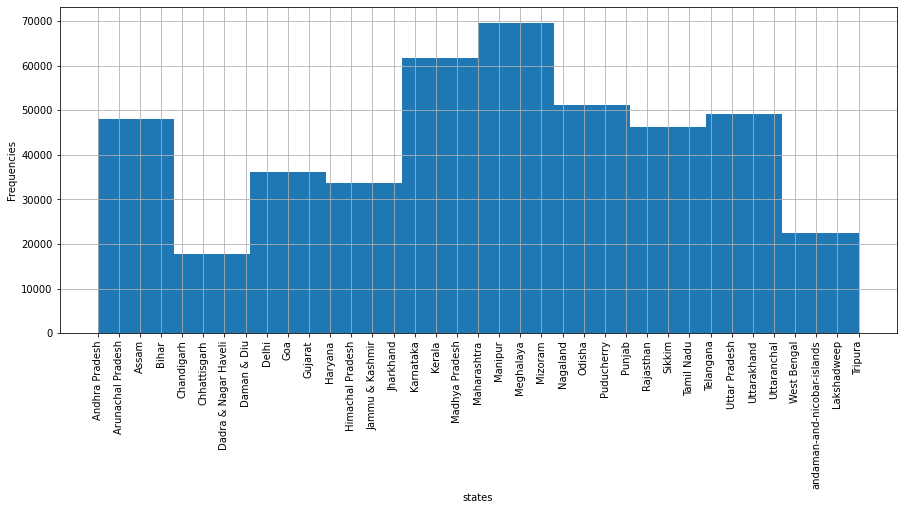

In [40]:
# Visualising the frequency of states in the data.

plt.figure(figsize = (15, 6))
plt.xticks(rotation = 90)
df.state.hist()
plt.xlabel('states')
plt.ylabel('Frequencies')
plt.plot()

[]

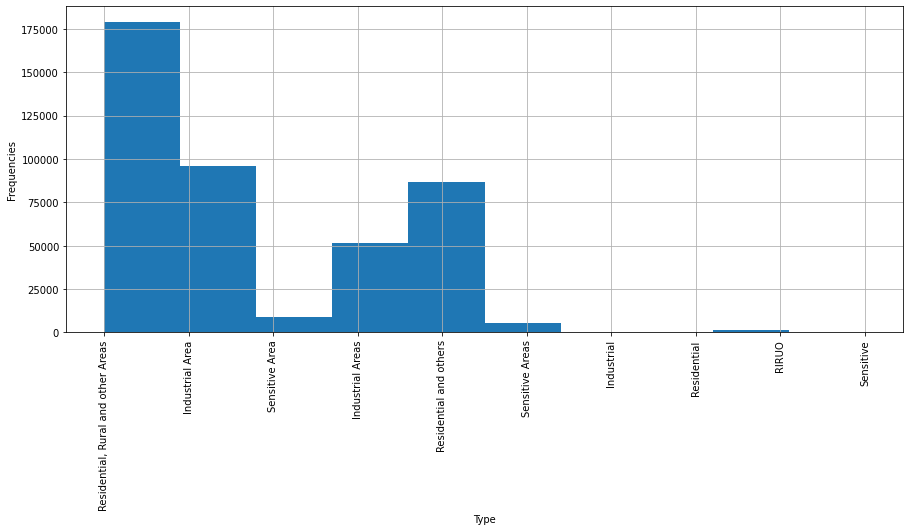

In [41]:
# Visualising types of areas in the data.

plt.figure(figsize = (15, 6))
plt.xticks(rotation = 90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()

[]

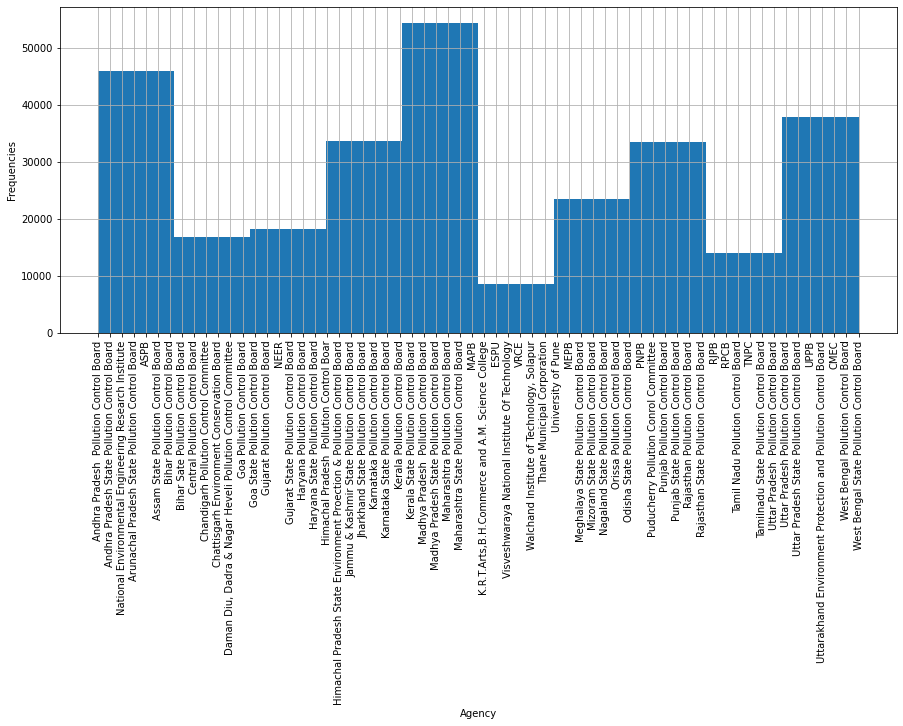

In [42]:
# Visualising the count of Agency present in the dataset.

plt.figure(figsize = (15, 6))
plt.xticks(rotation = 90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()

<AxesSubplot:xlabel='state', ylabel='so2'>

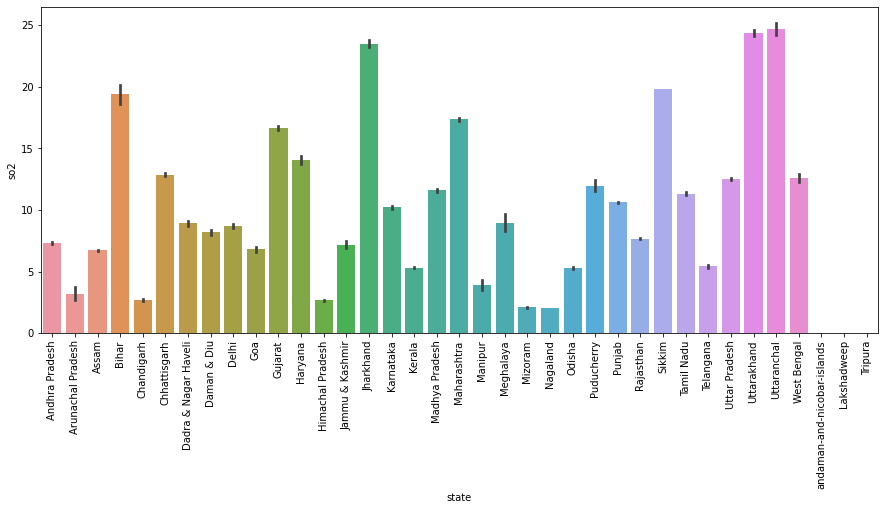

In [43]:
# Checking so2 (Sulphur dioxide concentration) levels in each state.

plt.figure(figsize = (15, 6))
plt.xticks(rotation = 90)
sns.barplot(x = 'state',y = 'so2',data = df)

# so2 level is high in Uttaranchal followed by Uttarakhand.

<AxesSubplot:xlabel='state', ylabel='no2'>

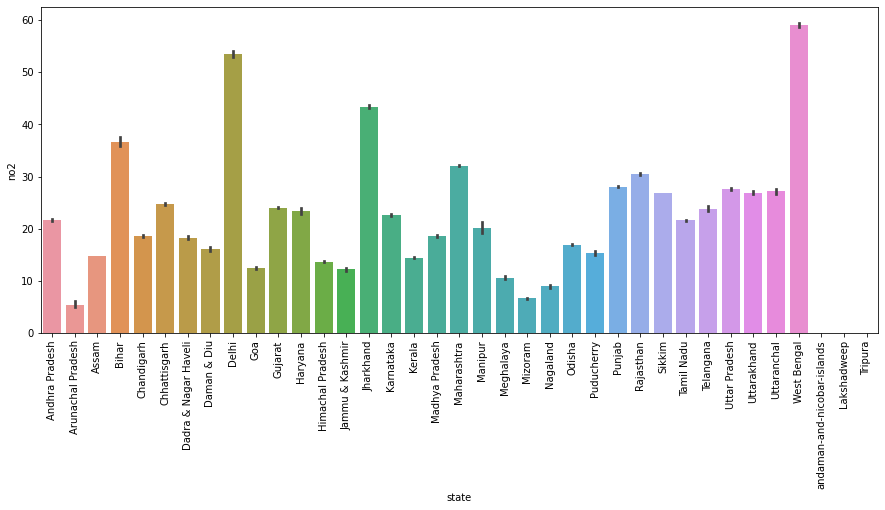

In [44]:
# Checking no2 (Nitrogen dioxide concentration) levels in each state.

plt.figure(figsize = (15, 6))
plt.xticks(rotation = 90)
sns.barplot(x = 'state',y = 'no2',data = df)

# West bengal has highest no2 level.

<AxesSubplot:xlabel='state', ylabel='rspm'>

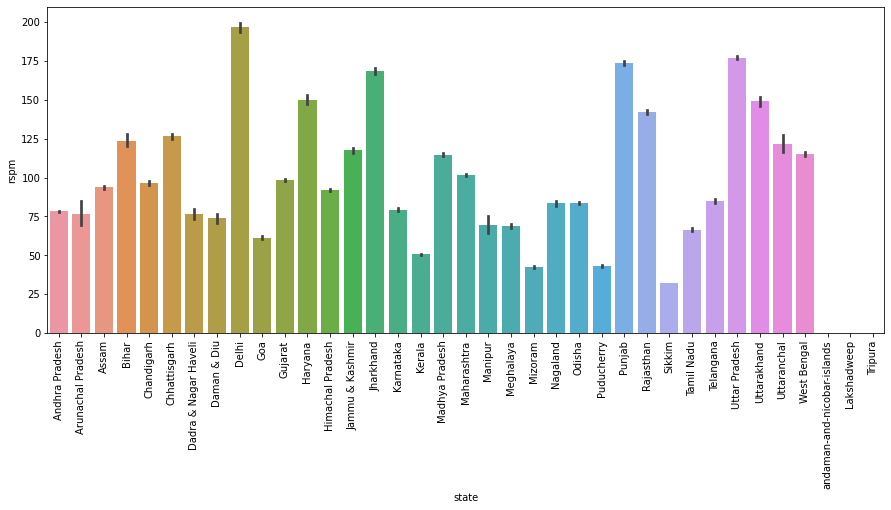

In [45]:
# Checking rspm (Respirable suspended particualte matter concentration) levels in each state.

plt.figure(figsize = (15, 6))
plt.xticks(rotation = 90)
sns.barplot(x = 'state',y = 'rspm',data = df)

# Delhi has highest rspm level. 

<AxesSubplot:xlabel='state', ylabel='spm'>

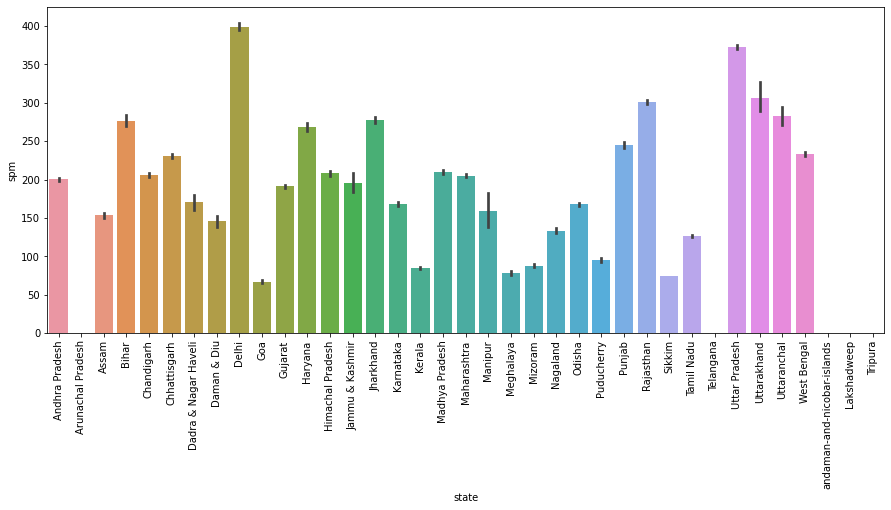

In [46]:
# Checking spm (Suspended particulate matter) levels in each state.

plt.figure(figsize = (15, 6))
plt.xticks(rotation = 90)
sns.barplot(x = 'state',y = 'spm',data = df)

# Delhi has highest spm level.

<AxesSubplot:xlabel='state', ylabel='pm2_5'>

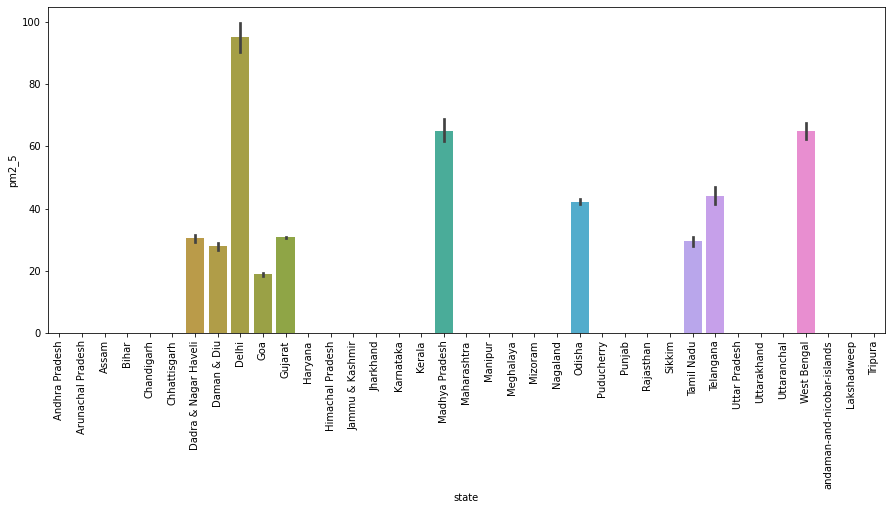

In [47]:
# Checking pm2_5 (Particulate matter 2.5) levels in each state.

plt.figure(figsize = (15, 6))
plt.xticks(rotation = 90)
sns.barplot(x = 'state',y = 'pm2_5',data = df)

# Delhi has highest pm2_5 level.

In [48]:
# Dropping unnecessary columns.

df.drop(['agency'],axis = 1,inplace = True)
df.drop(['stn_code'],axis = 1,inplace = True)
df.drop(['date'],axis = 1,inplace = True)
df.drop(['sampling_date'],axis = 1,inplace = True)
df.drop(['location_monitoring_station'],axis = 1,inplace = True)

In [49]:
# Checking missing values in remaining columns.

df.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [50]:
# Replacing null values with "mode" for categorical variables.

df['location'] = df['location'].fillna(df['location'].mode()[0])

df['type'] = df['type'].fillna(df['type'].mode()[0])

In [51]:
# Replacing null values with "median" for numerical variables.

df['so2'].fillna(df['so2'].median(), inplace = True)

df['no2'].fillna(df['no2'].median(), inplace = True)

df['rspm'].fillna(df['rspm'].median(), inplace = True)

df['spm'].fillna(df['spm'].median(), inplace = True)

df['pm2_5'].fillna(df['pm2_5'].median(), inplace = True)

In [52]:
# Checking missing values.

df.isnull().sum()

# There are no missing values now.

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [53]:
# Calculating the individual pollutant index for so2 (Sulphur dioxide).

def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi'] = df['so2'].apply(cal_SOi)
data = df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [54]:
# Calculating the individual pollutant index for no2 (Nitrogen dioxide).

def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi'] = df['no2'].apply(cal_Noi)
data = df[['no2','Noi']]
data.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [55]:
# Calculating the individual pollutant index for rspm (Respirable suspended particualte matter concentration).

def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi'] = df['rspm'].apply(cal_RSPMI)
data = df[['rspm','Rpi']]
data.head()

,rspm,Rpi
0,90.0,0.0
1,90.0,0.0
2,90.0,0.0
3,90.0,0.0
4,90.0,0.0


In [56]:
# Calculating the individual pollutant index for spm (Suspended particulate matter).

def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
df['SPMi'] = df['spm'].apply(cal_SPMi)
data = df[['spm','SPMi']]
data.head()

,spm,SPMi
0,187.0,158.0
1,187.0,158.0
2,187.0,158.0
3,187.0,158.0
4,187.0,158.0


In [57]:
# Caluclating the Air Quality Index.

def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI'] = df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis = 1)
data = df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,158.0,158.0
1,Andhra Pradesh,3.875,8.750,0.0,158.0,158.0
2,Andhra Pradesh,7.750,35.625,0.0,158.0,158.0
3,Andhra Pradesh,7.875,18.375,0.0,158.0,158.0
4,Andhra Pradesh,5.875,9.375,0.0,158.0,158.0


In [58]:
# Using threshold values to classify a particular value as good, moderate, poor, unhealthy, very unhealthy and Hazardous.

def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,90.0,187.0,32.0,6.000,21.750,0.0,158.0,158.0,Poor
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,90.0,187.0,32.0,3.875,8.750,0.0,158.0,158.0,Poor
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,90.0,187.0,32.0,7.750,35.625,0.0,158.0,158.0,Poor
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,90.0,187.0,32.0,7.875,18.375,0.0,158.0,158.0,Poor
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,90.0,187.0,32.0,5.875,9.375,0.0,158.0,158.0,Poor


In [59]:
# Checking the values of AQI_Range.

df['AQI_Range'].value_counts()

Poor              327002
Unhealthy          31733
Moderate           30473
Hazardous          18700
Very unhealthy     15823
Good               12011
Name: AQI_Range, dtype: int64

<AxesSubplot:xlabel='state', ylabel='Count'>

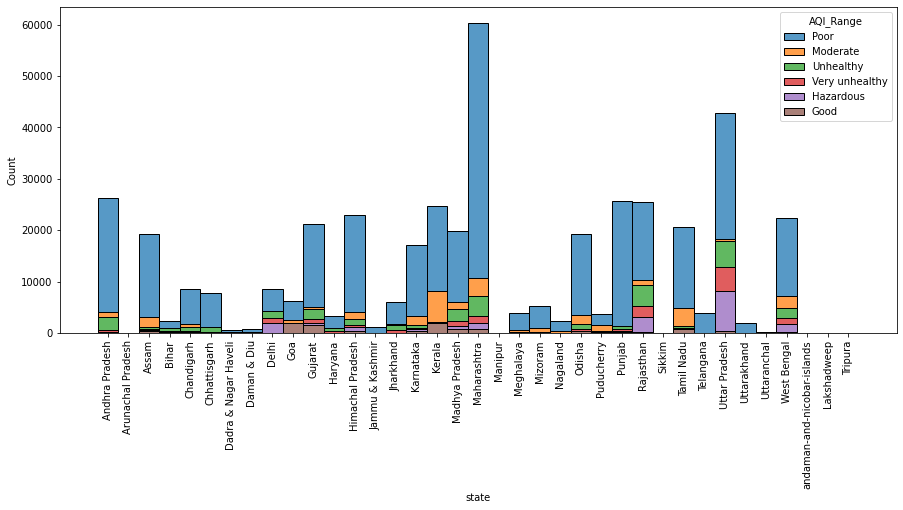

In [60]:
# AQI_Range of different states.

plt.figure(figsize = (15, 6))
plt.xticks(rotation = 90)
sns.histplot(binwidth = 0.5, x = "state", hue = "AQI_Range", data = df, stat = "count", multiple = "stack")

# Most of the states have poor AQI but AQI of Uttar Pradesh is hazardous.

### **Model Building**

### **Linear Regression**

In [61]:
# Storing predictor variables and independent variable separately.

X = df[['SOi','Noi','Rpi','SPMi']]

Y = df['AQI']

In [62]:
# Splitting data into train and test data.

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 100)

In [63]:
# Building Linear regression model.

model = LinearRegression()

model.fit(X_train,Y_train)

LinearRegression()

In [64]:
# Predicting the test data.

y_pred = model.predict(X_test)

In [65]:
# Calculating R_squared and RMSE.

RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

print("RMSE for test data = ",str(RMSE_test))

print('-'*50)

print('RSquared value for test data:',model.score(X_test, Y_test))

RMSE for test data =  3.554983824343476
--------------------------------------------------
RSquared value for test data: 0.9979101612497329


### **Decision Tree Regressor**

In [66]:
# Building Decision tree regressor model.

DT = DecisionTreeRegressor()

DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [67]:
# Predicting the test data.

y_pred = DT.predict(X_test)

In [68]:
# Calculating R_squared and RMSE.

RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

print("RMSE for test data = ",str(RMSE_test))

print('-'*50)

print('RSquared value for test data:',DT.score(X_test, Y_test))

RMSE for test data =  0.8073544881332619
--------------------------------------------------
RSquared value for test data: 0.9998922130836347


### **Random Forest Regressor**

In [69]:
# Building Random forest regressor model.

RF = RandomForestRegressor()

RF. fit(X_train,Y_train)

RandomForestRegressor()

In [70]:
# Predicting the test data.

y_pred = RF.predict(X_test)

In [71]:
# Calculating R_squared and RMSE.

RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

print("RMSE for test data = ",str(RMSE_test))

print('-'*50)

print('RSquared value for test data:',RF.score(X_test, Y_test))

RMSE for test data =  0.6630932757244492
--------------------------------------------------
RSquared value for test data: 0.9999272912350832


### **Conclusions:**

1. Factors that influence Air quality index are:
*  so2 individual pollutant index (si).
*  no2 individual pollutant index (ni).
*  rspm (Respirable suspended particualte matter concentration) individual pollutant index (rpi).
*  spm (Suspended particulate matter) individual pollutant index (spi).

2. Out of Linear regression, Decision tree regressor and Random forest regressor, random forest regressor results in best predictions with R_Squared value of 99.99% and Root mean squared error (RMSE) of 0.6.